In [1]:
from google.colab import drive
drive.mount('/content/drive') 
#seulement si on travaille sur google drive
import os
os.chdir("/content/drive/MyDrive/formationOCR/P6")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import pandas as pd
import numpy as np
import os

In [7]:
!pip install opencv-contrib-python==4.4.0.44


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
cv2.__version__

'4.5.5'

<font color='red'> # Avoir des infos sur les images: 
   

*   nombre de pixels moyens, max, min
*   largeurmax, longueur max, min 


  


In [ ]:
os.getcwd()

'/content/drive/MyDrive/formationOCR/P6'

In [5]:
list_image_name=os.listdir(""+os.getcwd()+"/Flipkart/Images/")

In [6]:
l_s=pd.Series(list_image_name)

In [7]:
images_file_series=l_s[(l_s.apply(lambda x:x[-4:])==".jpg")].reset_index(drop=True)

In [ ]:
from PIL import Image

# Charger l'image
img = Image.open(r""+os.getcwd()+"/Flipkart/Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg") 

# Afficher l'image chargée
img.show()

In [ ]:
img.size

(1100, 935)

In [2]:
data = pd.read_csv(
    r"" + os.getcwd() + "/Flipkart/flipkart_com-ecommerce_sample_1050.csv"
)

In [ ]:
set(data.image.tolist())-set(images_file_series.tolist()),set(images_file_series.tolist())-set(data.image.tolist())

(set(), set())

On dispose donc de tous les noms correctement connus dans le dossier des images! Pour test on peut afficher 4 images par catégories déjà connues

In [3]:
df=data[['image','product_category_tree']]
del data

In [34]:
df.product_category_tree=df.product_category_tree.apply(lambda x:x.split('>>')[0][2:-1])

In [ ]:
df.head()

,image,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing


In [ ]:
d_=df.groupby('product_category_tree').sample(3)

In [ ]:
for k,i in enumerate(d_.image):
  print(str(k)+' '+str(i))

0 dd5d6f0649f40d49791bbd5c00758e2f.jpg
1 f4e7f269319ba9cf5507a9e2febacbf5.jpg
2 27b7851ae3dfc2ae8c1958cebe93bf0b.jpg
3 0b793c1727ef52285a25dedf8b86626b.jpg
4 8e94fbcd81112a21860355b3b11cf52d.jpg
5 a231459c1562ee1117e95a61128820b7.jpg
6 8141b9d5af35017a907b1e88c17f7963.jpg
7 d43d9bb261aaaf818c81a645e727b2d3.jpg
8 44b963eb856b4831dfdd21b666593c95.jpg
9 cf2ba696547459733c6bbfad4e3bcf62.jpg
10 82fbc93cd45ab747e7e606f2c52c7335.jpg
11 3113367c72125a3355af42426fe14f17.jpg
12 26269fd0df12630eec4508c2cf3c94e1.jpg
13 f2658bad8c2b7d5b08984c6ac34267f7.jpg
14 414d2065e1aed847064bcf14538eabc8.jpg
15 a3dea07b2f7bf48276d32513091be717.jpg
16 cab75cad4b3a3c593c753a1759df28e2.jpg
17 06fdaa2b03d70da4358311d260456729.jpg
18 c91f9dc1fdd8b4d60c6b2a2b607e3e8f.jpg
19 4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg
20 6b04c746cac2aa811d7a8753e54dc96e.jpg


In [38]:
img=cv2.imread(r""+os.getcwd()+"/Flipkart/Images/"+df.image[821])

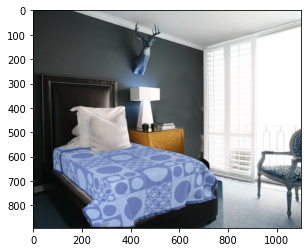

In [39]:
plt.imshow(img)

In [40]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)


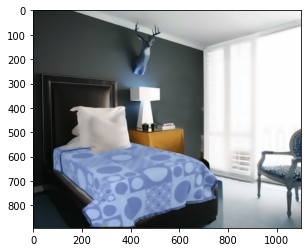

In [41]:
plt.imshow(dst)

In [ ]:
Image.open(r""+os.getcwd()+"/Flipkart/Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg") 

NoneType

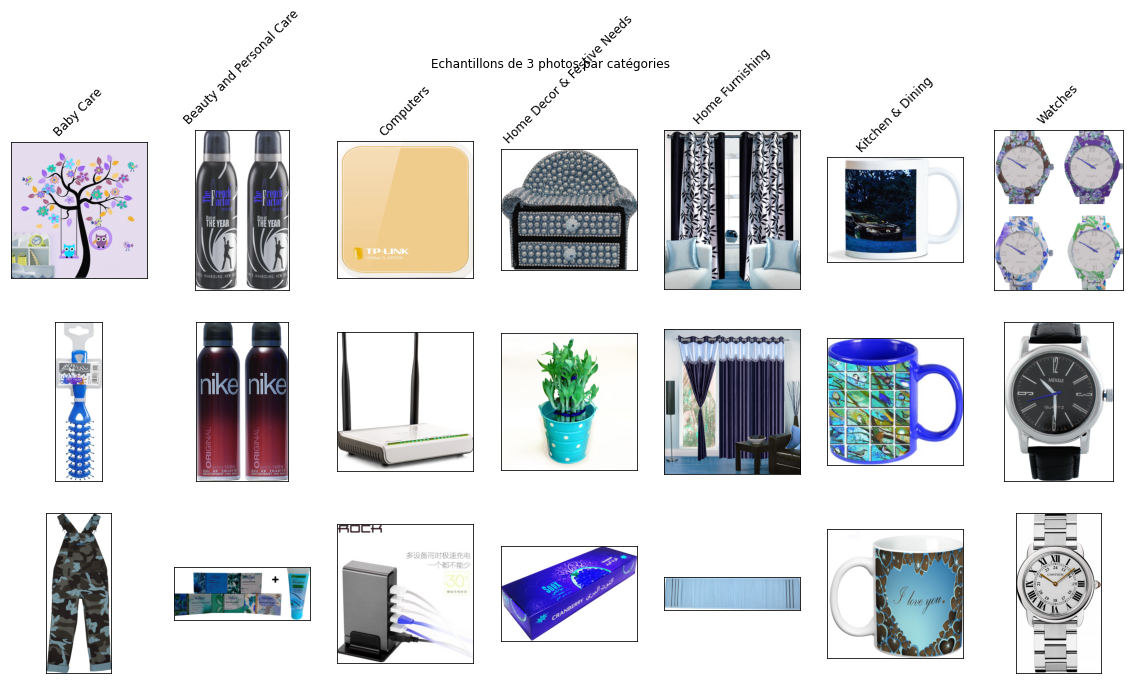

In [ ]:



fig,axes=plt.subplots(nrows=3,ncols=7,figsize=(20,10))
for n,k in enumerate(d_.product_category_tree.unique()):
  for n_,i in enumerate(d_[d_.product_category_tree==k].image):
    axes[n_,n].imshow(cv2.imread(r""+os.getcwd()+"/Flipkart/Images/"+i))

  axes[0,n].set_title(k,rotation=45)

fig.suptitle('Echantillons de 3 photos par catégories')
for ax in axes.reshape(1,-1)[0]:
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
cv2.imread(r""+os.getcwd()+"/Flipkart/Images/"+i).shape

(1775, 936, 3)

In [ ]:
import os

In [35]:
path=r""+os.getcwd()+"/Flipkart/Images/"

In [ ]:
df.image[0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

# SIFT

In [30]:
import cv2
cv2.__version__

'4.5.5'

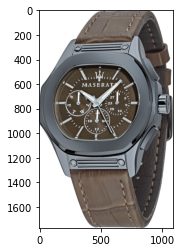

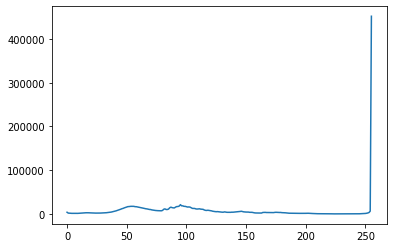

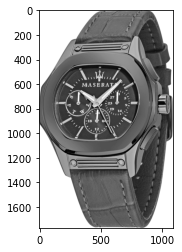

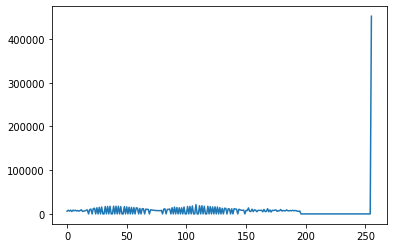

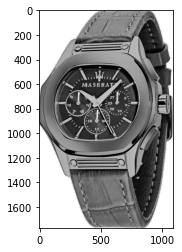

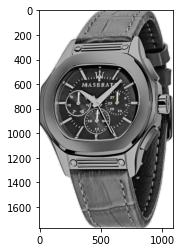

Descripteurs :  (1001, 128)

[[30.  1.  1. ...  1.  3.  1.]
 [39.  3.  0. ...  3.  2.  3.]
 [ 5.  1.  0. ... 11. 39.  2.]
 ...
 [62. 16.  1. ... 79. 33. 15.]
 [60. 22.  3. ...  1.  0. 47.]
 [ 0.  2. 12. ...  4.  1.  4.]]


In [ ]:
sift = cv2.xfeatures2d.SIFT_create(300)
plt.imshow(cv2.imread(path+df.image[5]))
plt.show() # convert in gray


image = cv2.imread(path+df.image[5],0) 
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()



plt.imshow(image,cmap='gray')
plt.show()# convert in gray
image = cv2.equalizeHist(image)  
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
plt.imshow(image,cmap='gray')
plt.show()
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp[:100],image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


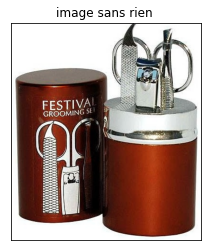

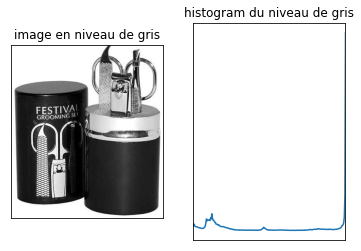

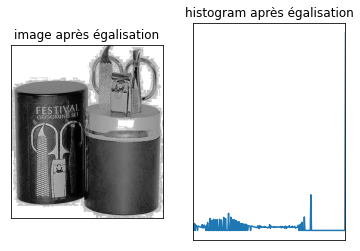

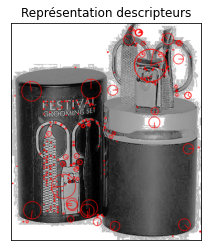

Descripteurs :  (300, 128)

[[  0.   0.   1. ...   5.   4.   4.]
 [ 32.   0.   2. ... 131.  16.   1.]
 [ 39.  26.  37. ...   2.   1.   5.]
 ...
 [  0.   3.  91. ...   0.   0.   0.]
 [ 67.  16.   1. ...   0.  12.  21.]
 [  2.   0.   2. ...   0.   0.   0.]]


In [61]:
sift = cv2.xfeatures2d.SIFT_create(300)
plt.imshow(cv2.imread(path+df.image[125]))
plt.xticks([])
plt.yticks([])
plt.title('image sans rien ')
plt.show() # convert in gray


image = cv2.imread(path+df.image[125],0) 
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('image en niveau de gris')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(image.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.xticks([])
plt.yticks([])
plt.title('histogram du niveau de gris')

plt.show()


image = cv2.equalizeHist(image)  
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('image après égalisation')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(image.ravel(),256,[0,255])
plt.xlim([0,255])
plt.xticks([])
plt.yticks([])
plt.plot(hist)
plt.title('histogram après égalisation')
plt.show()







kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,
                      kp, 0,
                      (255, 0, 0),
                      
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Représentation descripteurs')
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)





In [43]:
des.shape

(301, 128)

In [ ]:
des.shape

(11754, 128)

In [ ]:
p=(sift.detect(image,None))

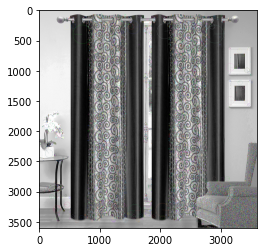

In [ ]:
img=cv2.drawKeypoints(image,p,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [12]:
import time
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(300)

for image_num in range(len(df.image)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+df.image[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)
    del image,res,kp

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\Users\miche\AppData\Local\Temp\ipykernel_21312\559800168.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (313933, 128)
temps de traitement SIFT descriptor :           359.93 secondes


In [13]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  560
Création de 560 clusters de descripteurs ...
temps de traitement kmeans :             3.57 secondes


In [14]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.13 secondes


In [23]:
cls

In [15]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 560)
Dimensions dataset après réduction PCA :  (1050, 425)


In [17]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df.product_category_tree
print(df_tsne.shape)


C:\Users\miche\anaconda3\envs\tf6\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


In [28]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


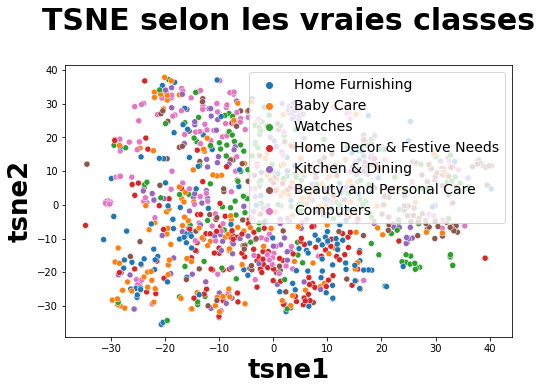

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [22]:
df_tsne.head()

,tsne1,tsne2,class
0,-20.714775,-35.466545,Home Furnishing
1,11.313562,-12.799939,Baby Care
2,0.670212,4.703289,Baby Care
3,8.821703,-21.590816,Home Furnishing
4,11.894107,-13.251627,Home Furnishing


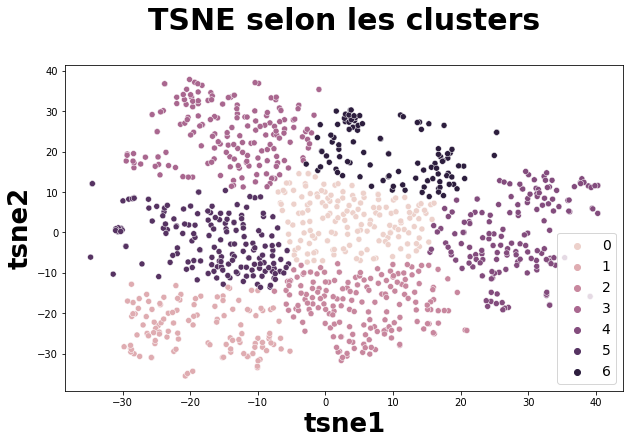

ARI :  0.062266332031850245


In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df.product_category_tree
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))